In [2]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [3]:

import gc
def loadBST(fn0):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
#         print(s,f[s].keys())
#        try:
         D=np.array(f[s]['values'])
#         print(s,D.shape)
         D2.append(D[:,:])
#        except:
#            continue;
    D2=np.array(D2)
    return D2


In [136]:
dhours=[]
dcnt=[]
#opath='xst_mean'
#fpath='bst_c10'
#fpath='bst2_c10' #Wrong sign
fpath='bst2_c10b'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files),files[0])

19 BST_2022-08-26-19-13-54.h5


In [137]:
if False:
    D=loadBST(fpath+'/'+files[0])
    n1,n2,n3=D.shape
    D=D.reshape([n1,n2,488,2])
else:
    D=[]
    for f in files:
        try:
            D2=loadBST(fpath+'/'+f)
            if D2.shape[0]==3600:
                print(f,D2.shape)
                D.append(D2)
            else:
                print(f,D2.shape,": Wrong length")
        except:
            print(f,"Failed")
    D=np.array(D)
    n0,n1,n2,n3=D.shape
    D=D.reshape([n0*n1,n2,488,2])
D=D[:,0,:,:]
D=D.swapaxes(1,2)
print(D.shape)


BST_2022-08-26-19-13-54.h5 (3600, 2, 976)
BST_2022-08-26-20-13-54.h5 (3600, 2, 976)
BST_2022-08-26-21-13-54.h5 (3600, 2, 976)
BST_2022-08-26-22-13-54.h5 (3600, 2, 976)
BST_2022-08-26-23-13-54.h5 (3600, 2, 976)
BST_2022-08-27-00-13-54.h5 (3600, 2, 976)
BST_2022-08-27-01-13-54.h5 (3600, 2, 976)
BST_2022-08-27-02-13-54.h5 (3600, 2, 976)
BST_2022-08-27-03-13-54.h5 (3600, 2, 976)
BST_2022-08-27-04-13-54.h5 (3600, 2, 976)
BST_2022-08-27-05-13-54.h5 (3600, 2, 976)
BST_2022-08-27-06-13-54.h5 (3600, 2, 976)
BST_2022-08-27-07-13-54.h5 (3600, 2, 976)
BST_2022-08-27-08-13-54.h5 (3600, 2, 976)
BST_2022-08-27-09-13-54.h5 (3600, 2, 976)
BST_2022-08-27-10-13-54.h5 (3600, 2, 976)
BST_2022-08-27-11-13-54.h5 (3600, 2, 976)
BST_2022-08-27-12-13-54.h5 (3600, 2, 976)
BST_2022-08-27-13-13-54.h5 Failed
(64800, 2, 488)


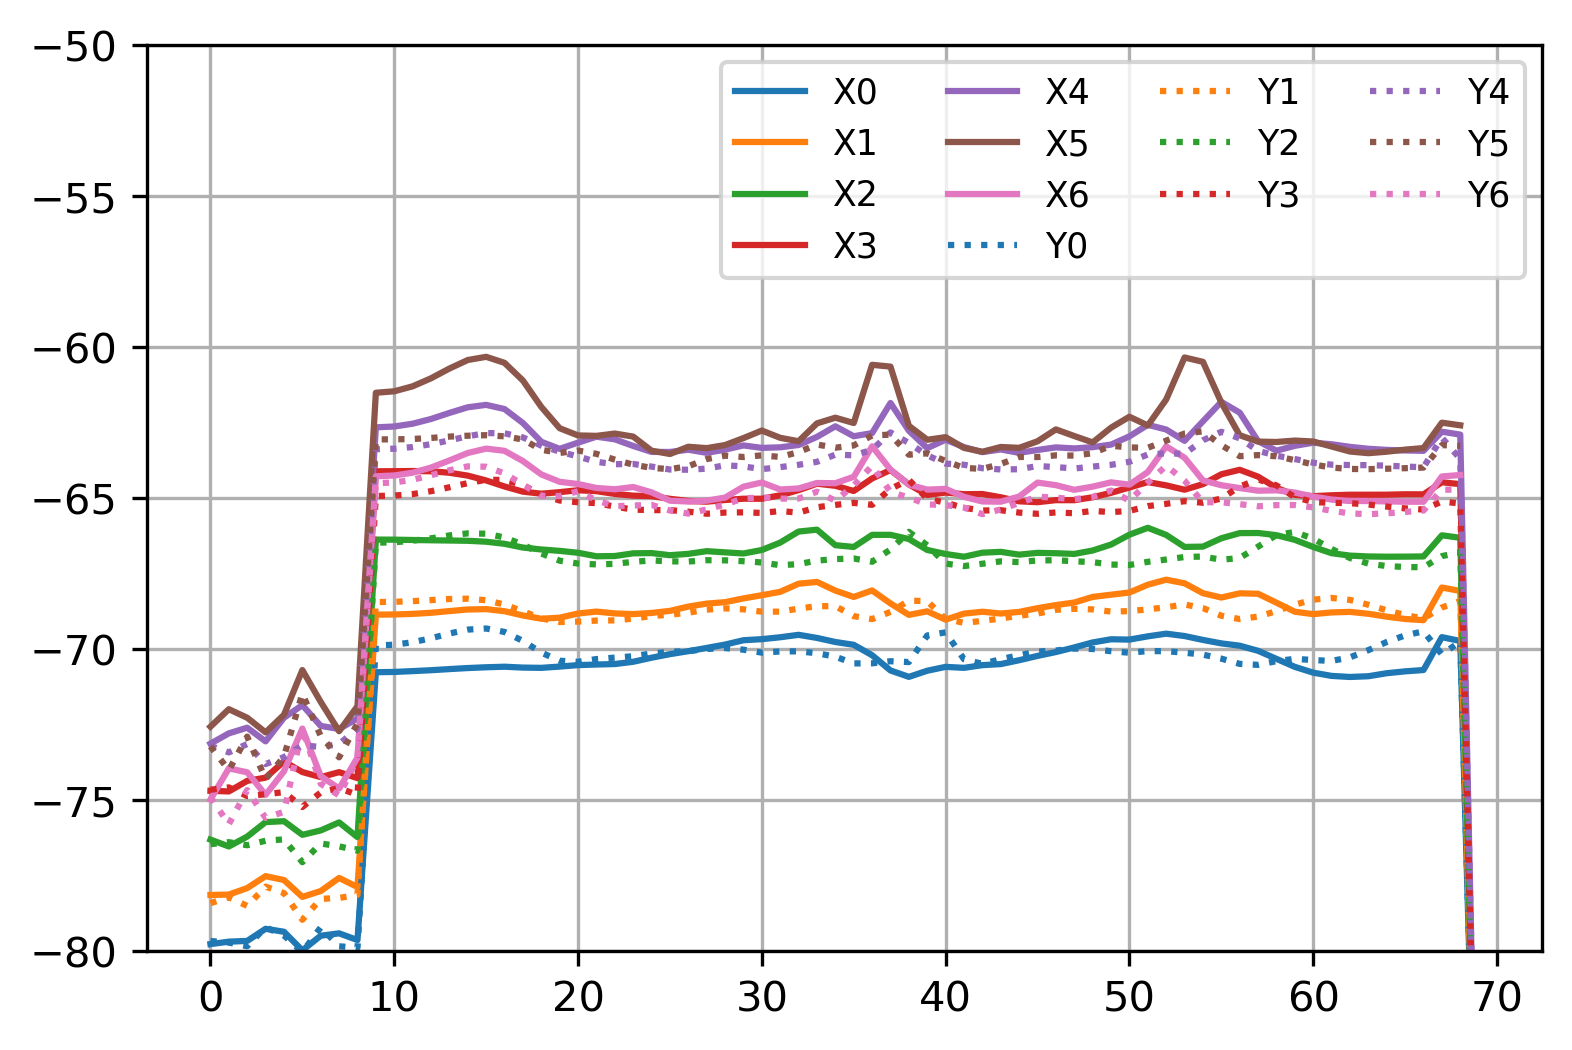

In [138]:
plt.figure(dpi=300)
Dm=np.percentile(D,50,axis=0)
freq=np.arange(512)/512*100
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
for i,si in enumerate(['X','Y']):
    for f in range(7):
       plt.plot(10*np.log10(Dm[i,f::7])-GainADC,'-' if i==0 else ':',label=si+str(f))
    plt.gca().set_prop_cycle(None)
plt.legend(fontsize='small',ncol=4)
plt.ylim(-80,-50)
plt.grid()

Text(0.5, 1.0, 'DTS BST: Power (dB) in LBA X-beam, f=50.8 MHz')

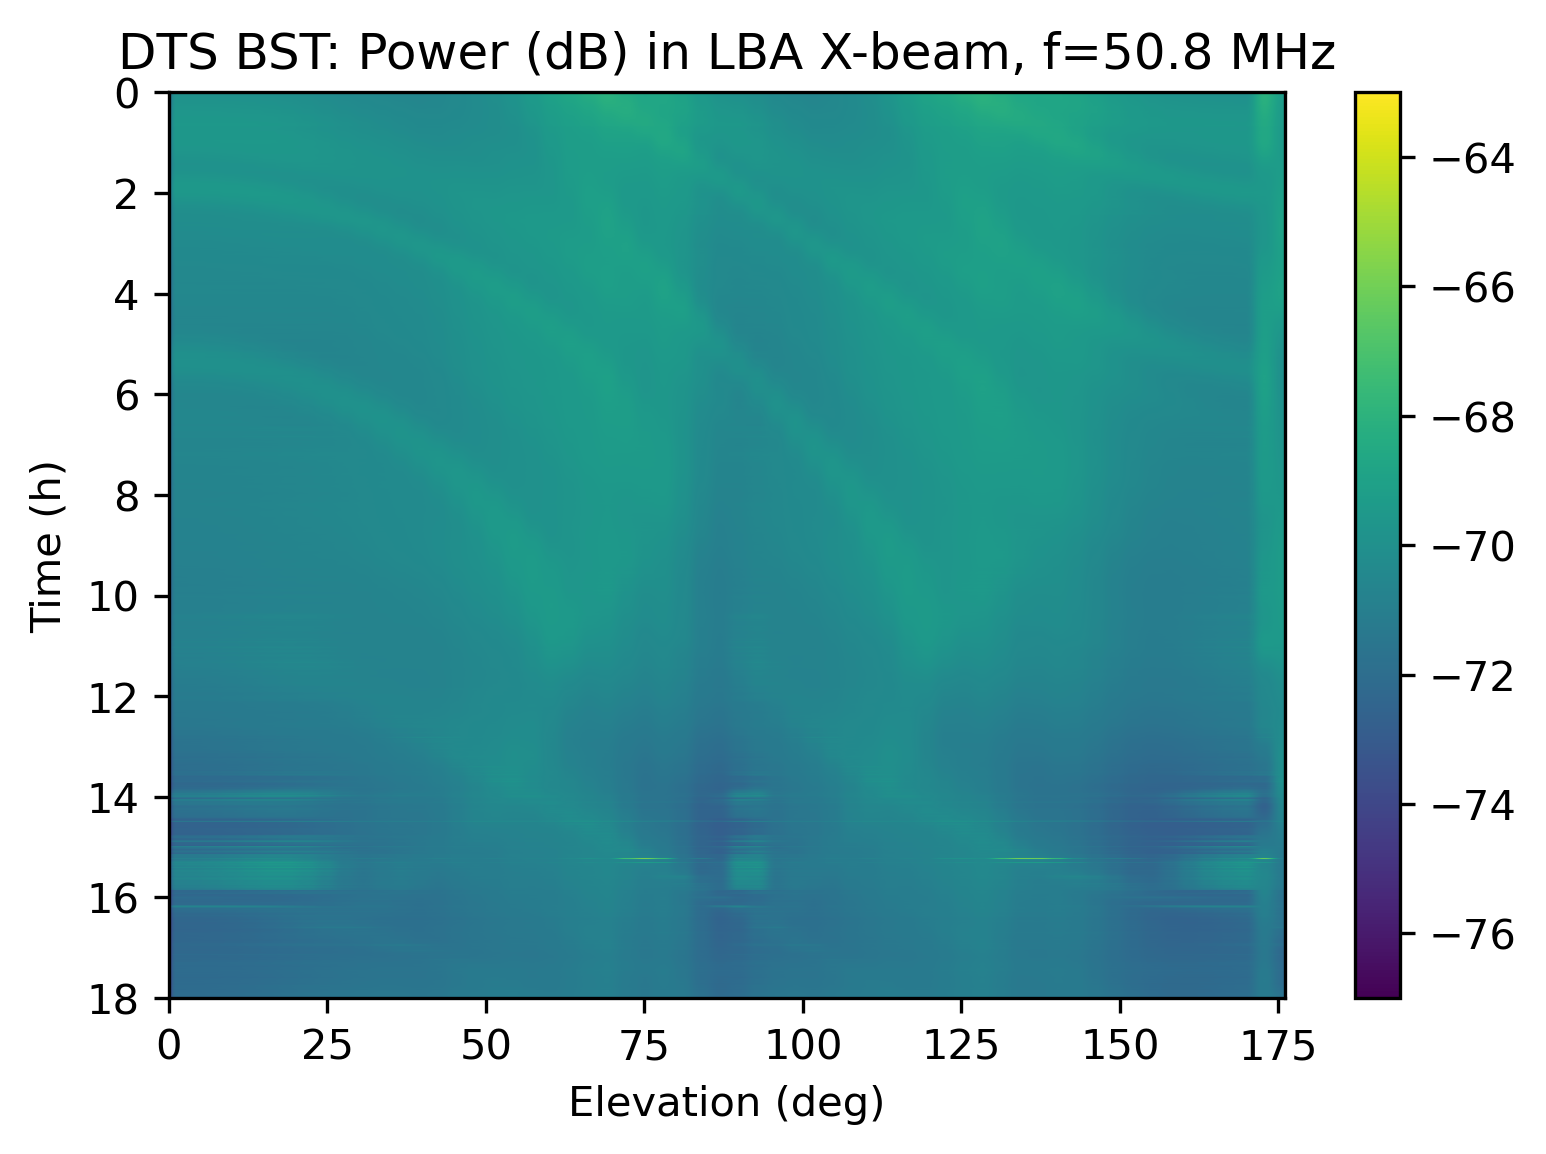

In [139]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,0,0::7])-GainADC,aspect='auto',vmin=-77,vmax=-63,extent=(0-27,69*3-27,D.shape[0]/60/60,0))
#plt.imshow(10*np.log10(D[:,0,0::7])-GainADC,aspect='auto',vmin=-67,vmax=-63,extent=(0-27,69*3-27,D.shape[0]/60/60,0))
#plt.imshow(10*np.log10(D[:,0,0::7])-GainADC,aspect='auto',vmin=-72,vmax=-68,extent=(0-27,69*3-27,D.shape[0]/60/60,0))
plt.ylabel("Time (h)")
plt.xlabel("Elevation (deg)")
plt.xlim(0,180-3-1)
plt.colorbar()
plt.title("DTS BST: Power (dB) in LBA X-beam, f=50.8 MHz")

Text(0.5, 1.0, 'DTS BST: Power (dB) in LBA Y-beam, f=50.8 MHz')

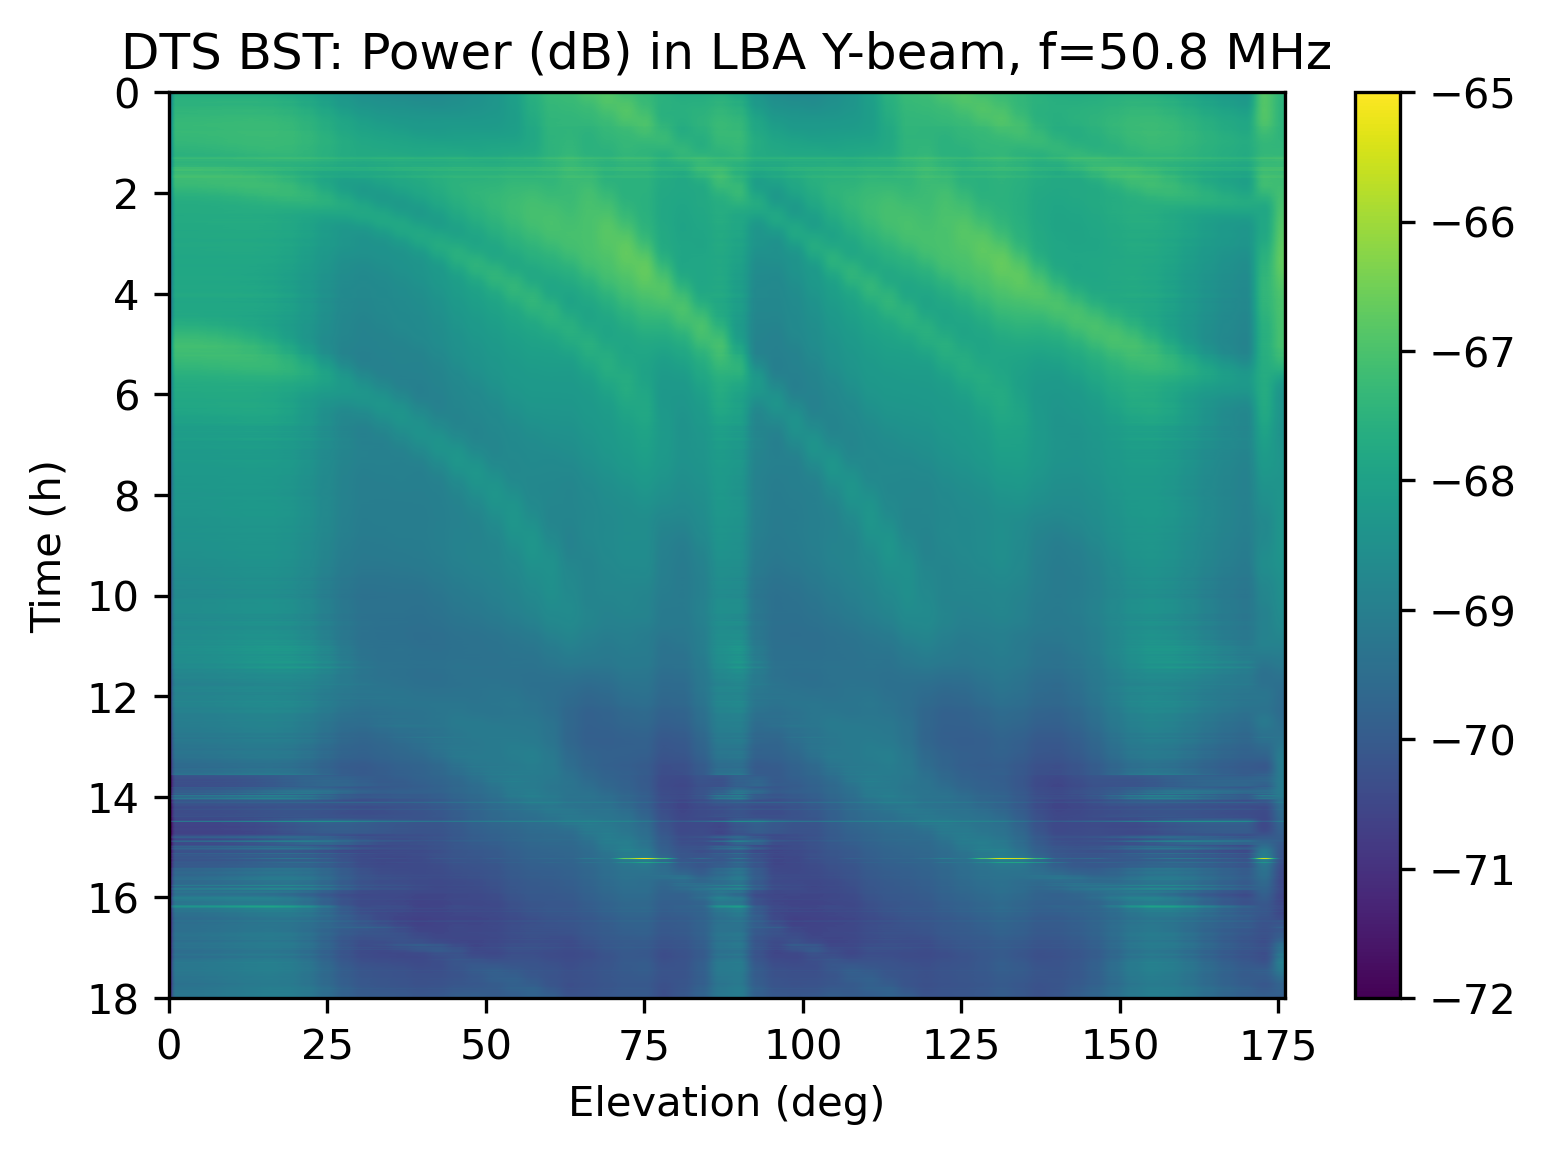

In [140]:
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,1::7])-GainADC,aspect='auto',vmin=-65,vmax=-61,extent=(0-27,69*3-27,D.shape[0]/60/60,0))
plt.imshow(10*np.log10(D[:,1,1::7])-GainADC,aspect='auto',vmin=-72,vmax=-65,extent=(0-27,69*3-27,D.shape[0]/60/60,0))
#plt.imshow(10*np.log10(D[:,1,1::7])-GainADC,aspect='auto',extent=(0-27,69*3-27,D.shape[0]/60/60,0))
plt.ylabel("Time (h)")
plt.xlabel("Elevation (deg)")
plt.xlim(0,180-3-1)
plt.colorbar()
plt.title("DTS BST: Power (dB) in LBA Y-beam, f=50.8 MHz")

Text(0.5, 1.0, 'DTS BST: Power (dB) in LBA X-beam, f=60.5 MHz')

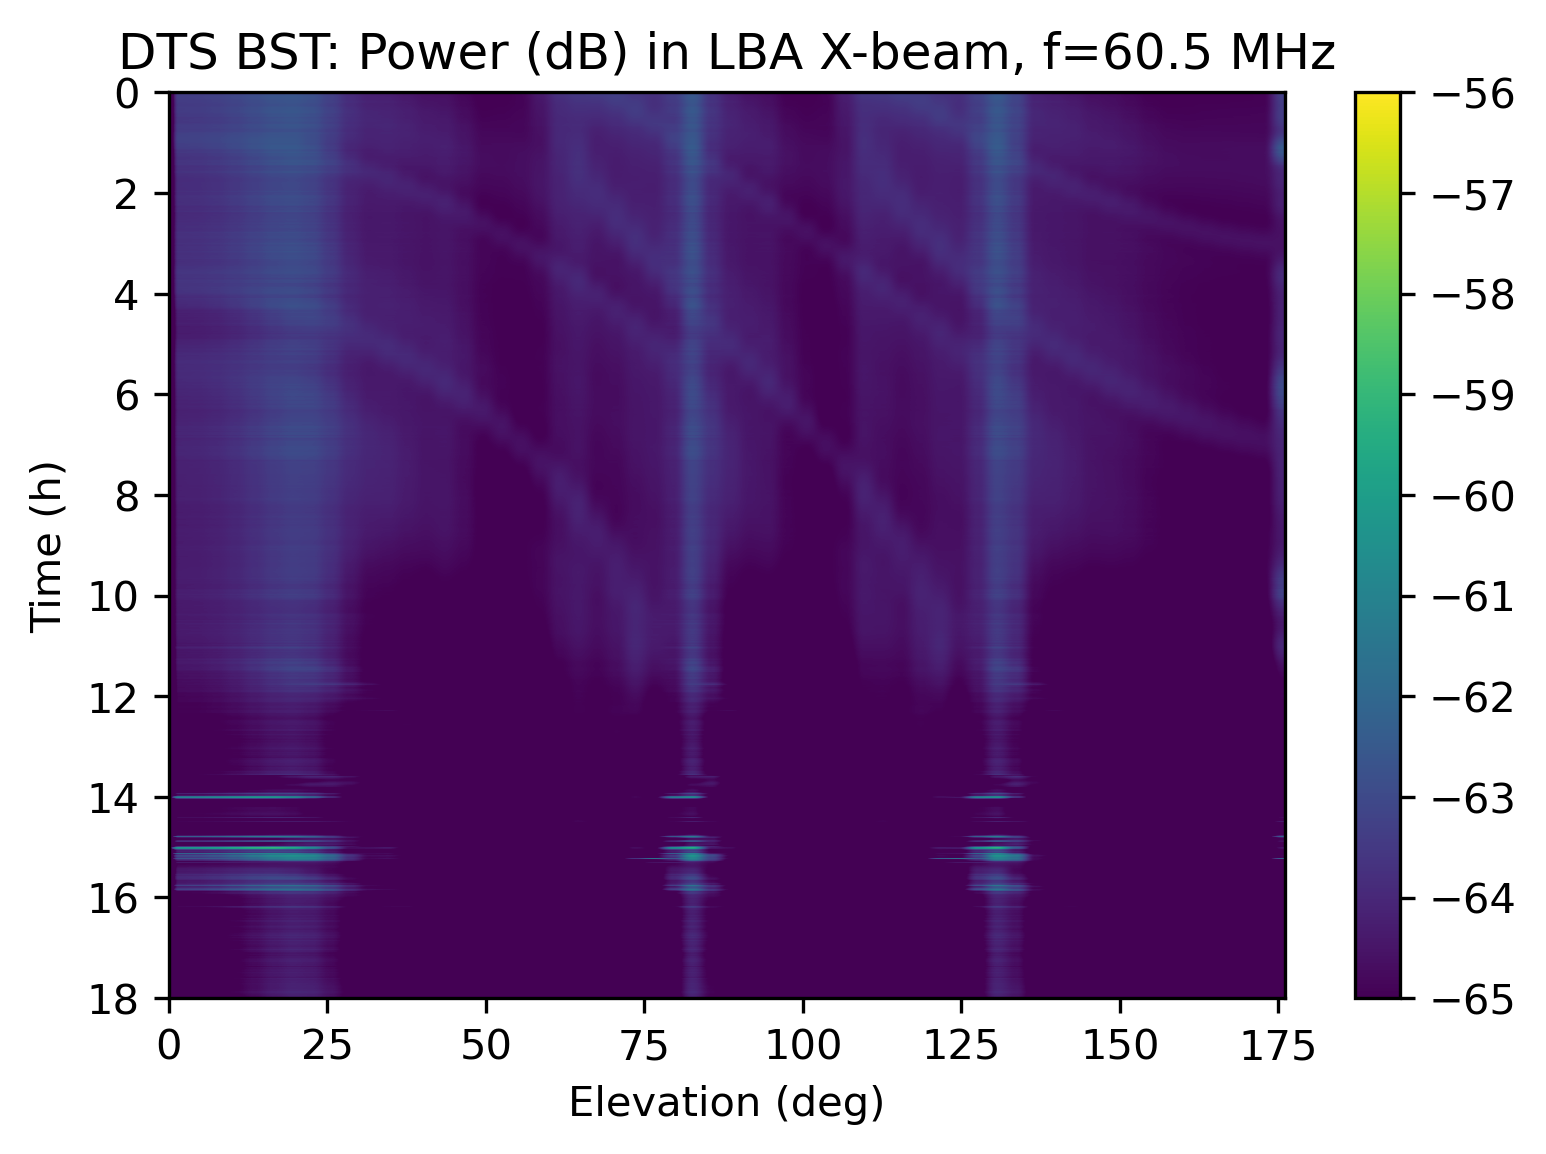

In [141]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,0,6::7])-GainADC,aspect='auto',vmin=-65,vmax=-56,extent=(0-27,69*3-27,D.shape[0]/60/60,0))
plt.ylabel("Time (h)")
plt.xlabel("Elevation (deg)")
plt.xlim(0,180-3-1)
plt.colorbar()
plt.title("DTS BST: Power (dB) in LBA X-beam, f=60.5 MHz")

Text(0.5, 1.0, 'DTS BST: Power (dB) in LBA Y-beam, f=60.5 MHz')

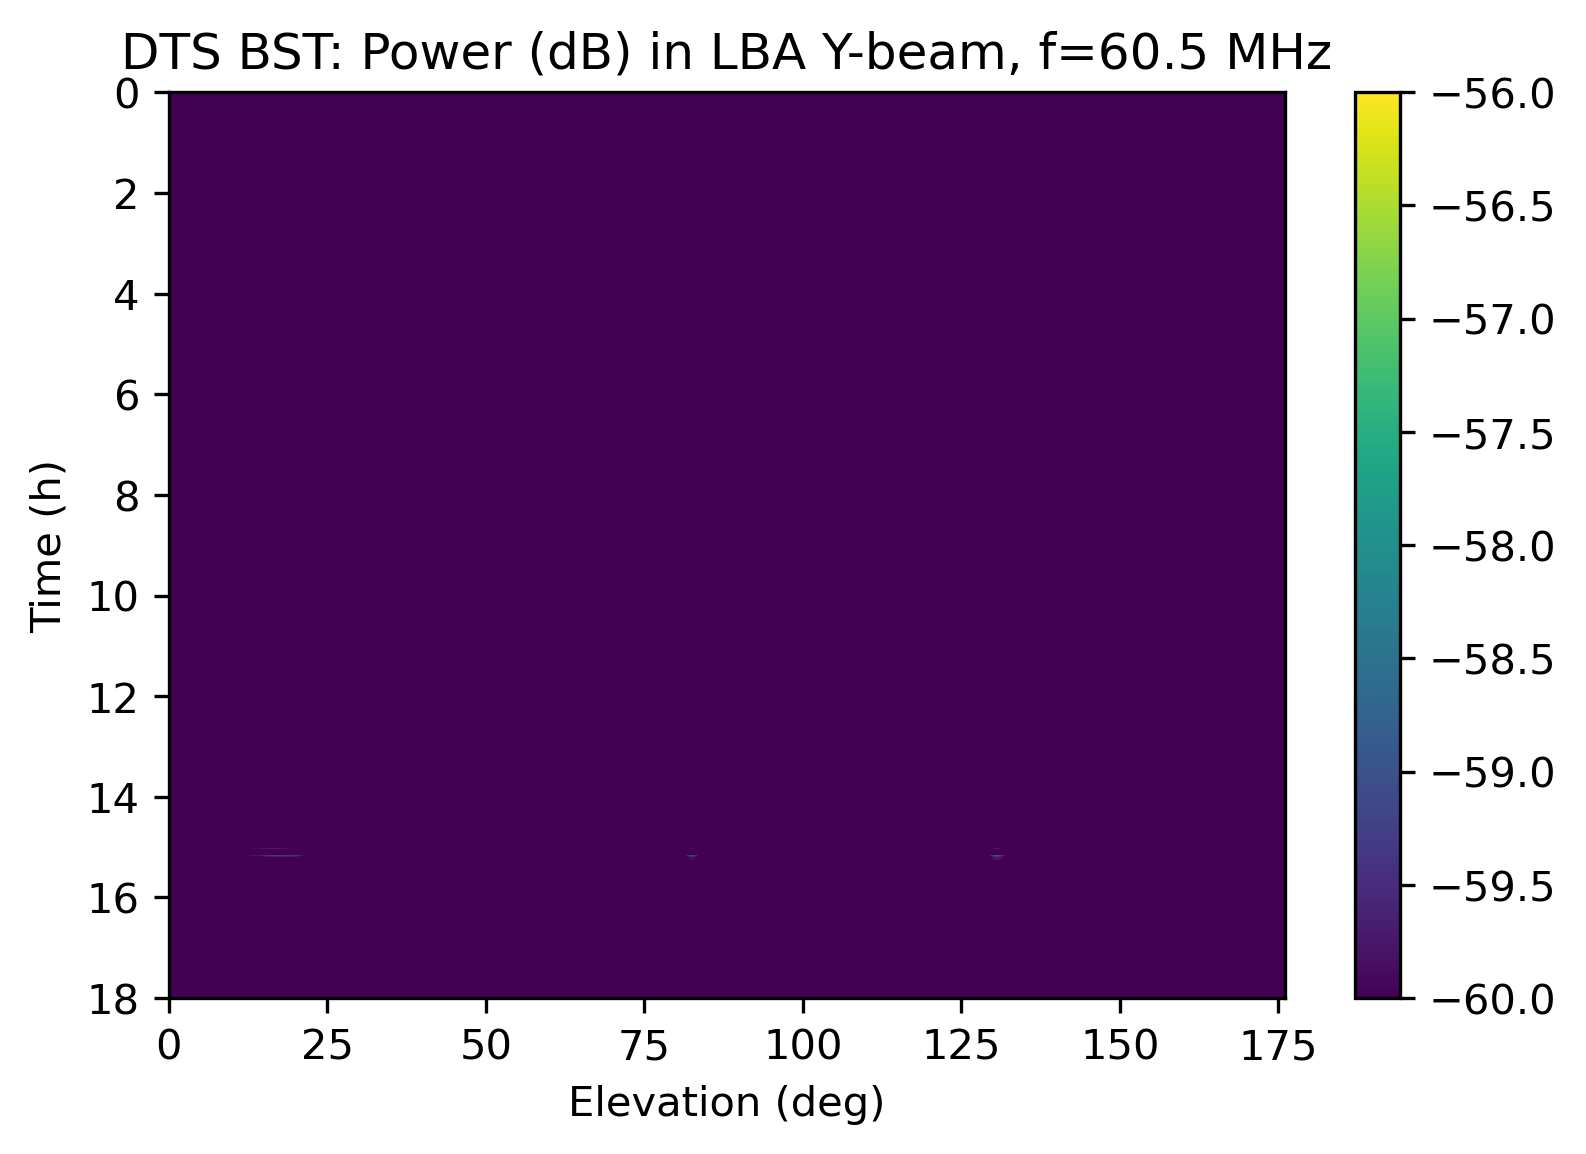

In [142]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,1,6::7])-GainADC,aspect='auto',vmin=-60,vmax=-56,extent=(0-27,69*3-27,D.shape[0]/60/60,0))
plt.ylabel("Time (h)")
plt.xlabel("Elevation (deg)")
plt.xlim(0,180-3-1)
plt.colorbar()
plt.title("DTS BST: Power (dB) in LBA Y-beam, f=60.5 MHz")

In [143]:
from astropy.coordinates import SkyCoord
CasA = SkyCoord.from_name('Cas A')
CygA = SkyCoord.from_name('Cyg A')
#Sun = SkyCoord.from_name('Sun')
stars=[CasA,CygA]

In [144]:
from astropy.coordinates import EarthLocation
import astropy.units as u
ASTRON=EarthLocation(lat=52.811186*u.deg,lon=6.395318*u.deg,height=50*u.m);
utcoffset = +2*u.hour


In [166]:
from astropy.time import Time
starttime=files[0][4:-3].split('-')
starttime='{0}-{1}-{2} {3}:{4}:{5}'.format(*starttime)
hours=np.arange(17.9*60)/60
time=Time(starttime) +hours*u.hour
#time = Time('2022-08-23 18:00:00') - utcoffset +np.arange(12)*u.hour
print(starttime,time)

2022-08-26 19:13:54 ['2022-08-26 19:13:54.000' '2022-08-26 19:14:54.000'
 '2022-08-26 19:15:54.000' ... '2022-08-27 13:04:54.000'
 '2022-08-27 13:05:54.000' '2022-08-27 13:06:54.000']


In [167]:
from astropy.coordinates import AltAz
from astropy.coordinates import get_sun
el=[]
altazs=[]
for star in stars:
    altaz = star.transform_to(AltAz(obstime=time,location=ASTRON))
    alt=altaz.alt.value/180*np.pi
    az=altaz.az.value/180*np.pi
    altazs.append([altaz.alt.value,altaz.az.value])
    Y=np.cos(alt)*np.sin(az)
    print(Y.shape)
    el.append(90-np.arcsin(Y)/np.pi*180)
if False:
    sun=get_sun(time)
    altaz = sun.transform_to(AltAz(location=ASTRON))
    alt=altaz.alt.value/180*np.pi
    az=altaz.az.value/180*np.pi
    altazs.append([altaz.alt.value,altaz.az.value])
    Y=np.cos(alt)*np.sin(az)/(altaz.alt.value>0)
    print(Y.shape)
    el.append(90-np.arcsin(Y)/np.pi*180)


(1074,)
(1074,)


In [168]:
for X in altazs[2:3]:
    plt.plot(X[0],label='Alt')
    plt.plot(X[1],':',label='Az')

Text(0.5, 0, 'elevation')

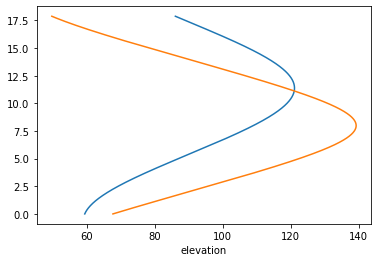

In [169]:
for X in el:
    plt.plot(X,hours)
plt.xlabel("elevation")

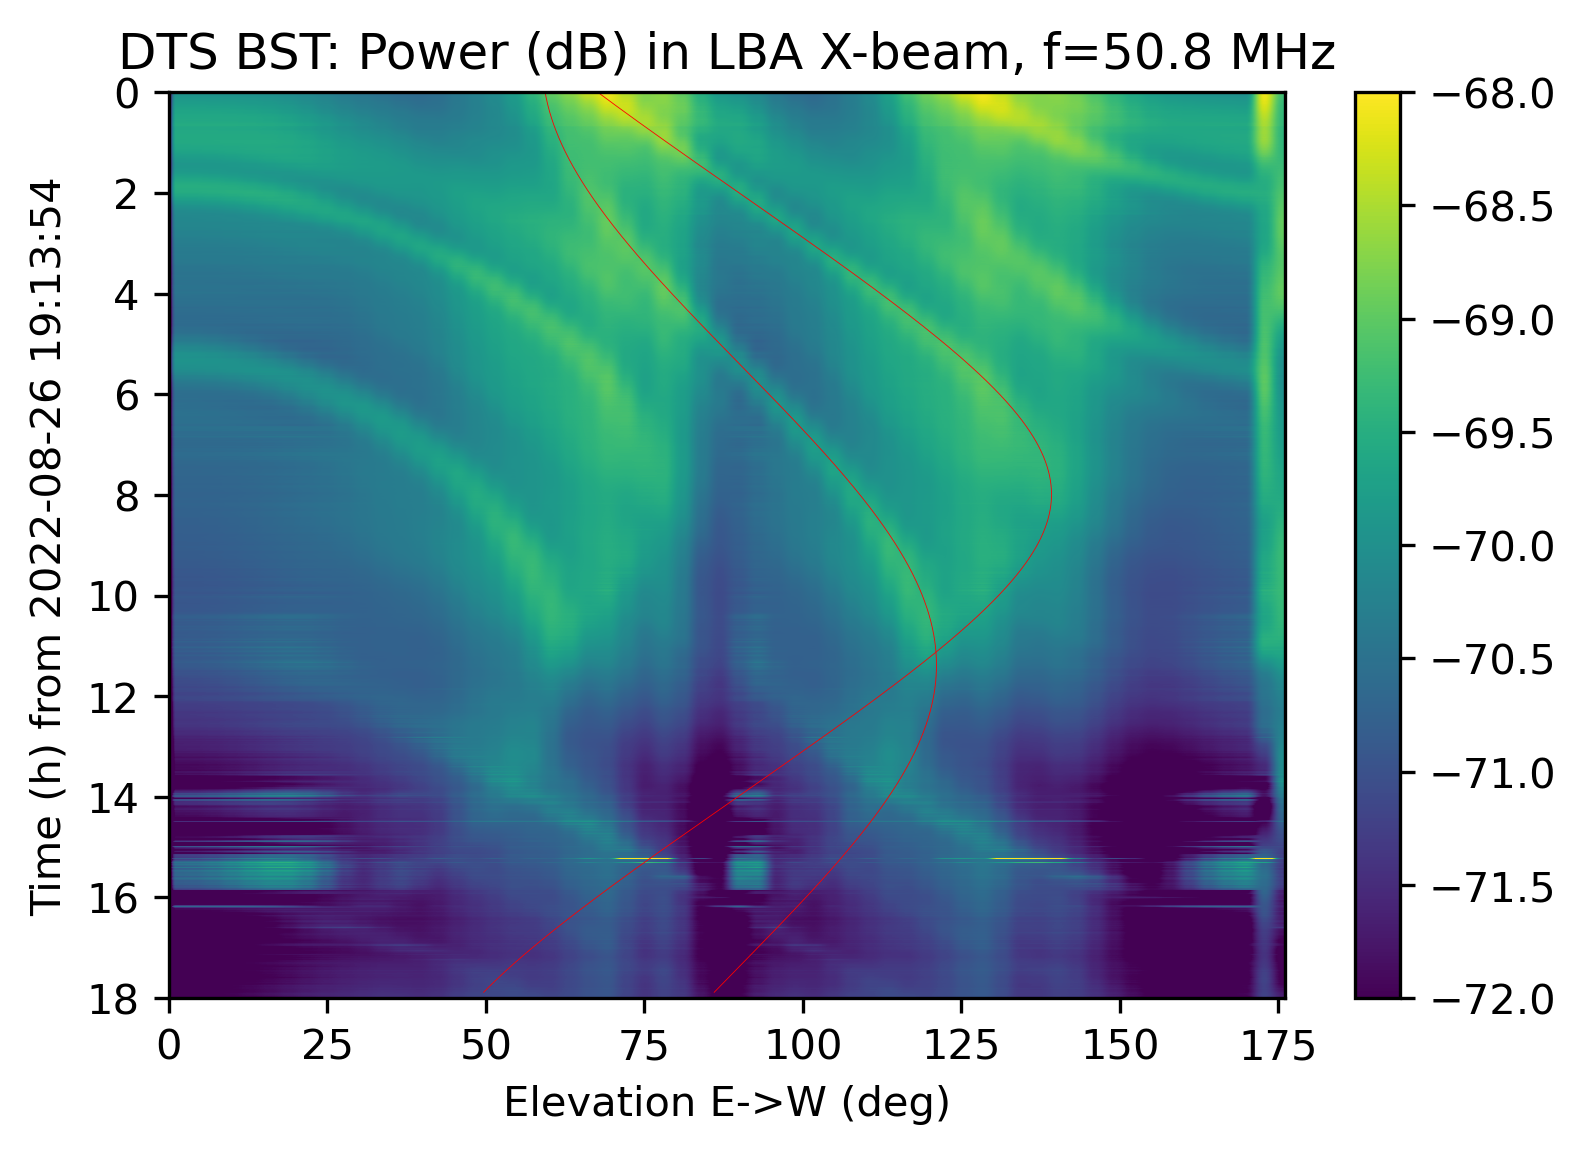

In [170]:
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,1::7])-GainADC,aspect='auto',vmin=-75,vmax=-60,extent=(0-27,69*3-27,D.shape[0]/60/60,0))
plt.imshow(10*np.log10(D[:,0,0::7])-GainADC,aspect='auto',vmin=-72,vmax=-68,extent=(0-27,69*3-27,D.shape[0]/60/60,0))
plt.ylabel("Time (h) from "+starttime)
plt.xlabel("Elevation E->W (deg)")
plt.xlim(0,180-3-1)
#plt.ylim(15.4,15.2)
#plt.ylim(12,0)
plt.colorbar()
#plt.title("DTS BST: Power (dB) in LBA Y-beam, f=50.8 MHz")
plt.title("DTS BST: Power (dB) in LBA X-beam, f=50.8 MHz")
for X in el:
    plt.plot(X,hours,'r-',linewidth=0.2)

Text(0, 0.5, 'Power in beam (dB)')

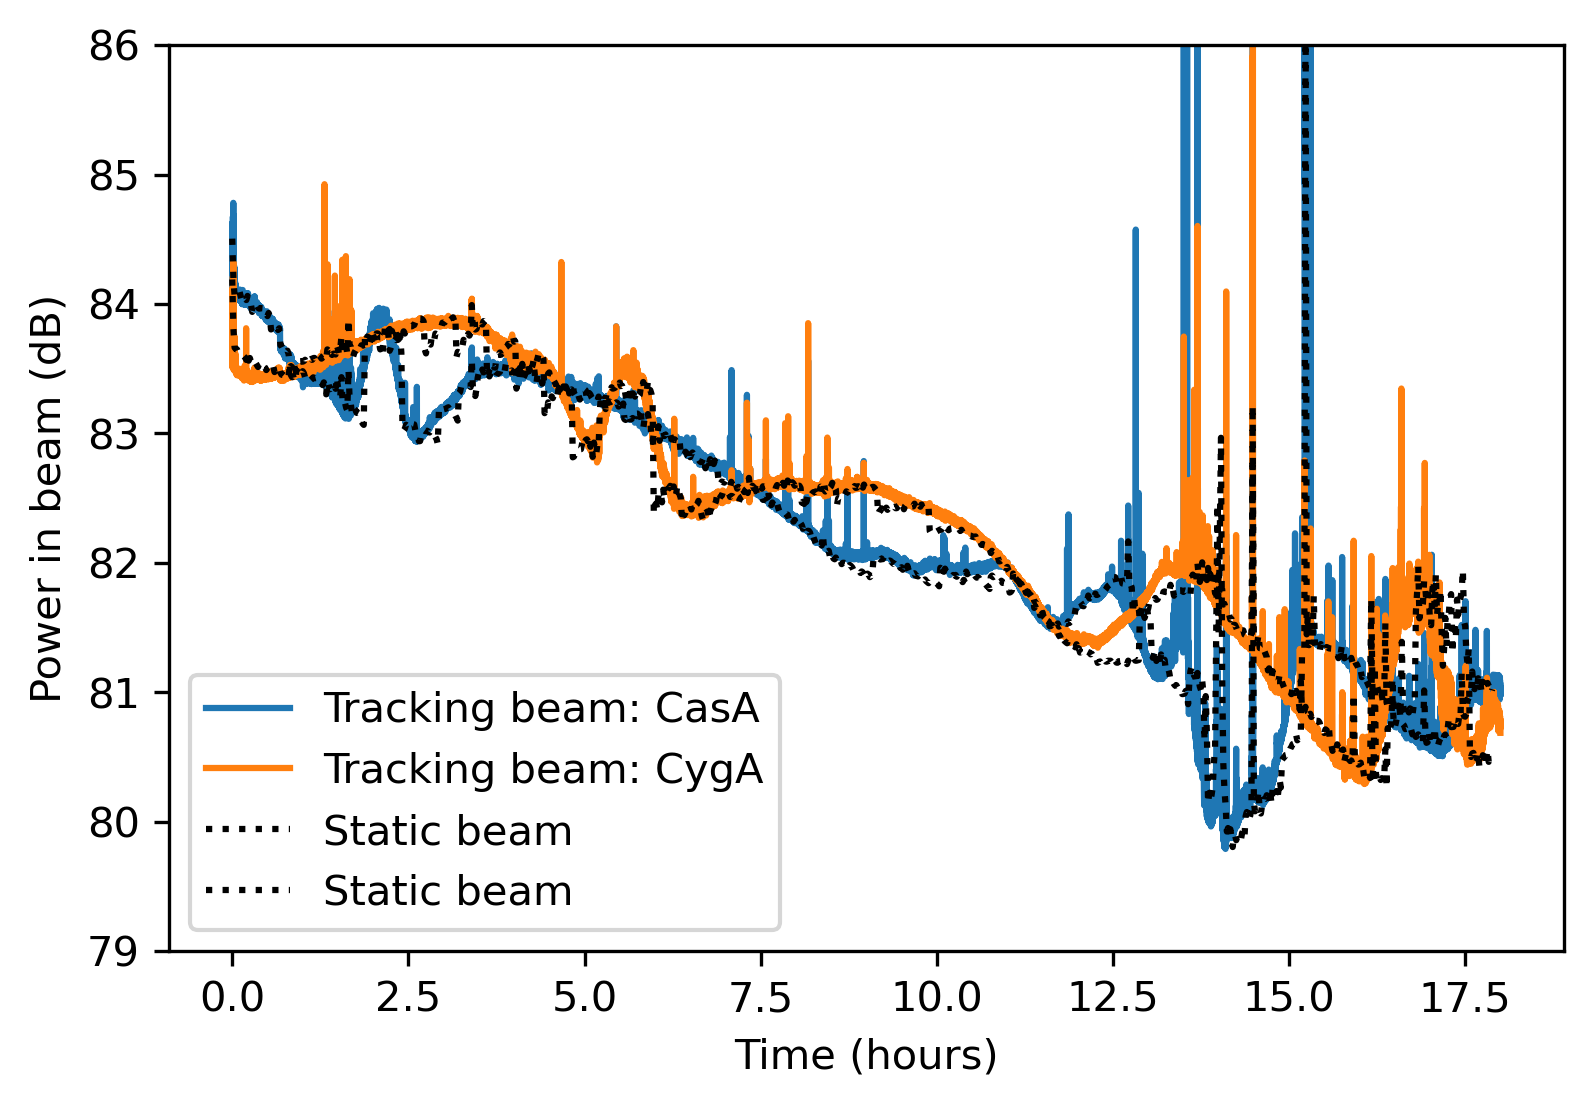

In [179]:
plt.figure(dpi=300)
t0=np.arange(D.shape[0])/60/60
for x in [67,68]:
    plt.plot(t0,10*np.log10(D[:,1,x*7]),label='Tracking beam: CasA' if x==67 else 'Tracking beam: CygA')
plt.gca().set_prop_cycle(None)
for X in el[::-1]:
    t1=np.arange(X.shape[0])/60
    idx=np.round(X/3).astype('int')*7+9*7;
    D1=[D[i*60,1,idx0] for i,idx0 in enumerate(idx)]
    plt.plot(t1,10*np.log10(D1),'k:',label='Static beam')
plt.legend()
plt.ylim(79,86)
plt.xlabel("Time (hours)")
plt.ylabel("Power in beam (dB)")

In [172]:
#time=Time("2022-08-25 12:00:00")
#for star in stars:
#    altaz = star.transform_to(AltAz(obstime=time,location=ASTRON))
#    print(altaz)